In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from magnitude_pruning.MagnitudePruning import MagnitudePruningNet

In [7]:
dataset = "Duffing"

if dataset == "Alu":
    with open('data/alu/alu_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/alu/alu_test.pickle', 'rb') as f:
        test_data = pickle.load(f)
        
if dataset == "Duffing":
    with open('data/duffing/duffing_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/duffing/duffing_test.pickle', 'rb') as f:
        test_data = pickle.load(f)

In [8]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [9]:
model = MagnitudePruningNet([3, 64, 64, 64, 2])

In [10]:
#model.train_n_epochs(train_loader=train_loader, n_epochs=300, pruning_epoch=300, sparsity=0.2, lr=0.001, verbose=True)
#model.train_n_epochs(train_loader=train_loader, n_epochs=300, pruning_epoch=300, sparsity=0.3, lr=0.001, verbose=True)
#model.train_n_epochs(train_loader=train_loader, n_epochs=300, pruning_epoch=300, sparsity=0.5, lr=0.001, verbose=True)
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, pruning_epoch=500, sparsity=0.9, lr=0.01, verbose=True)
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.001, verbose=True)

Epoch 0: loss 0.02491464652121067
Epoch 100: loss 0.00032781841582618654
Epoch 200: loss 0.0030559825245290995
Epoch 300: loss 0.0002265447546960786
Epoch 400: loss 0.00022878001618664712
Pruned. Sparsity is now 0.8999999761581421
Epoch 500: loss 0.12025606632232666
Epoch 600: loss 0.029004981741309166
Epoch 700: loss 0.028126975521445274
Epoch 800: loss 0.0381997749209404
Epoch 900: loss 0.06088494881987572
Epoch 0: loss 0.01728394813835621
Epoch 100: loss 0.0005163067253306508
Epoch 200: loss 0.00020145653979852796
Epoch 300: loss 0.00029874424217268825
Epoch 400: loss 0.00020639823924284428
Epoch 500: loss 0.0002528445911593735
Epoch 600: loss 0.00011022312537534162
Epoch 700: loss 0.00015741598326712847
Epoch 800: loss 0.00014274385466706008
Epoch 900: loss 0.0001727607159409672


In [11]:
y_pred = model(test_data.x).detach().numpy()

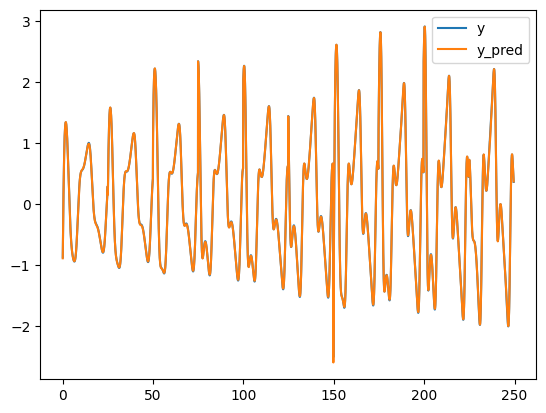

In [12]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [13]:
for layer in model.layers:
    print(layer.weight.count_nonzero() / (layer.weight.shape[0] * layer.weight.shape[1]))

tensor(0.1042)
tensor(0.1001)
tensor(0.1001)
tensor(0.1016)
